In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Project
## College Student Manegment EDA Analysis 

In [111]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\college_student_management_data.csv")

# Data Info 

In [112]:
df.shape

(1545, 15)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    1545 non-null   object 
 1   age                           1545 non-null   int64  
 2   gender                        1545 non-null   object 
 3   major                         1545 non-null   object 
 4   GPA                           1545 non-null   float64
 5   course_load                   1545 non-null   int64  
 6   avg_course_grade              1545 non-null   float64
 7   attendance_rate               1545 non-null   float64
 8   enrollment_status             1545 non-null   object 
 9   lms_logins_past_month         1545 non-null   int64  
 10  avg_session_duration_minutes  1545 non-null   int64  
 11  assignment_submission_rate    1545 non-null   float64
 12  forum_participation_count     1545 non-null   int64  
 13  vid

In [114]:
df.head()

,student_id,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,S001,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,S002,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,S003,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,S004,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,S005,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


# Data Handling & Cleaning 

In [115]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [116]:
df.drop(columns=["student_id"],inplace=True)

# EDA & Visualization

In [117]:
df.columns

Index(['age', 'gender', 'major', 'GPA', 'course_load', 'avg_course_grade',
       'attendance_rate', 'enrollment_status', 'lms_logins_past_month',
       'avg_session_duration_minutes', 'assignment_submission_rate',
       'forum_participation_count', 'video_completion_rate', 'risk_level'],
      dtype='object')

# Pie plot charts 

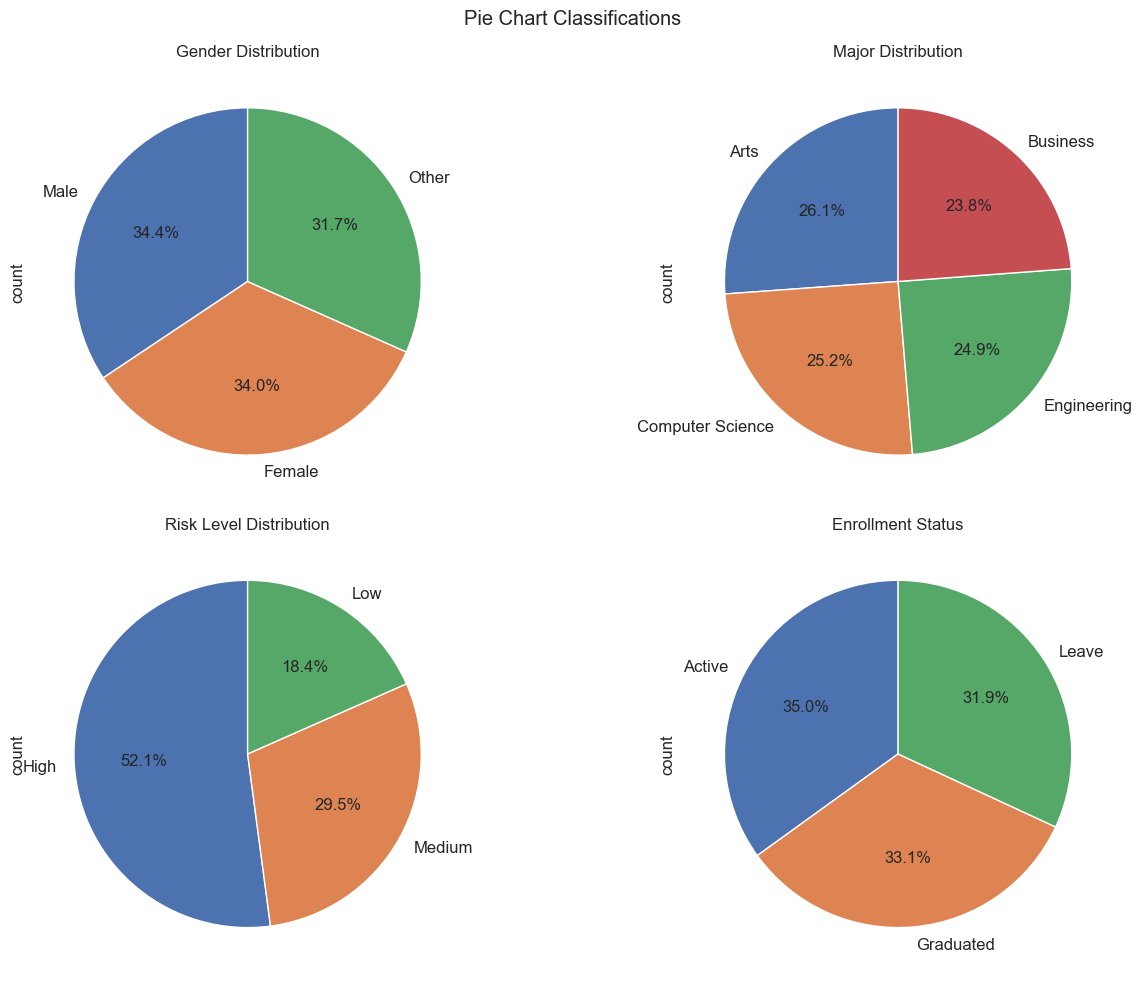

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gender Pie Chart
df["gender"].value_counts().plot(
    kind="pie", ax=axes[0, 0], autopct="%1.1f%%", startangle=90,
    title="Gender Distribution", fontsize=12
)

# Major Pie Chart
df["major"].value_counts().plot(
    kind="pie", ax=axes[0, 1], autopct="%1.1f%%", startangle=90,
    title="Major Distribution", fontsize=12
)

# Risk Level Pie Chart
df["risk_level"].value_counts().plot(
    kind="pie", ax=axes[1, 0], autopct="%1.1f%%", startangle=90,
    title="Risk Level Distribution", fontsize=12
)

# Enrollment Status Pie Chart (optional 4th chart)
df["enrollment_status"].value_counts().plot(
    kind="pie", ax=axes[1, 1], autopct="%1.1f%%", startangle=90,
    title="Enrollment Status", fontsize=12
)

plt.suptitle("Pie Chart Classifications")
plt.tight_layout()
plt.show()


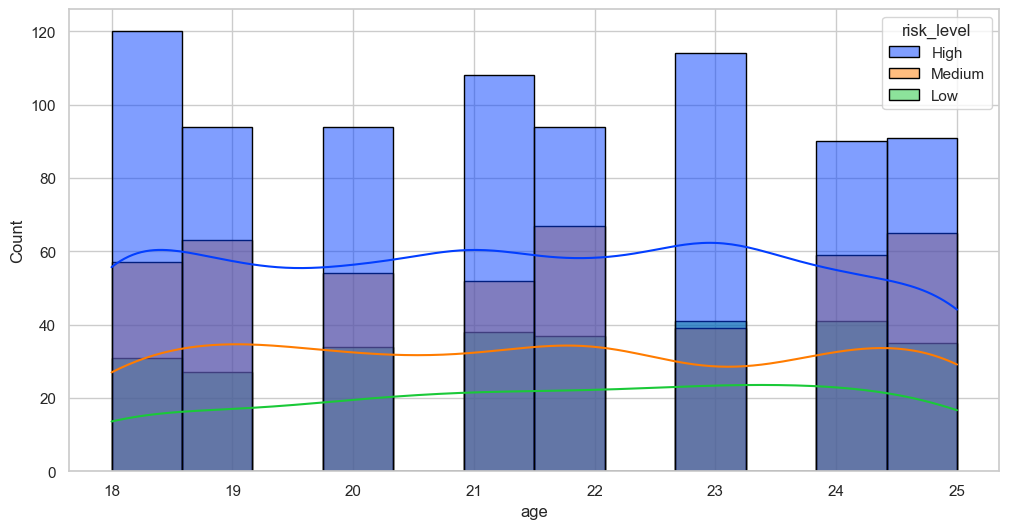

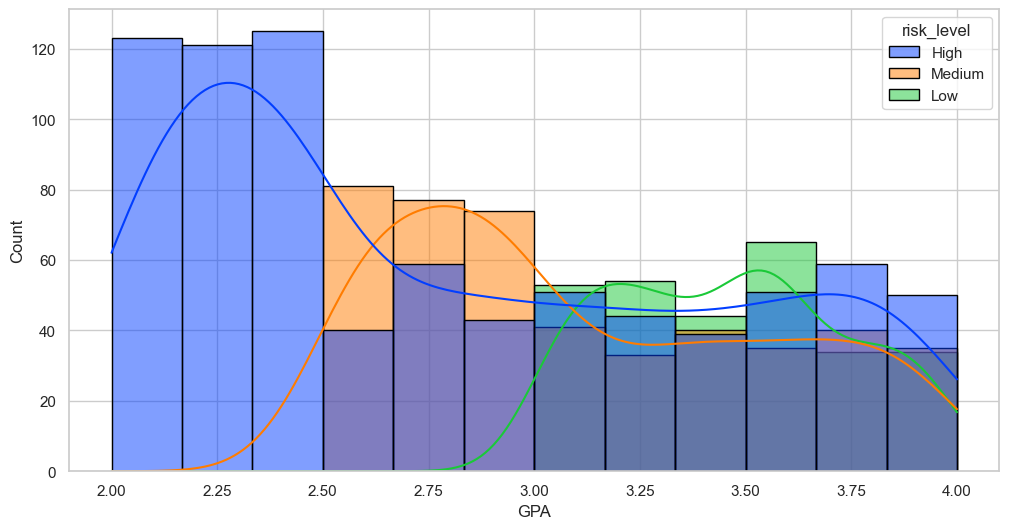

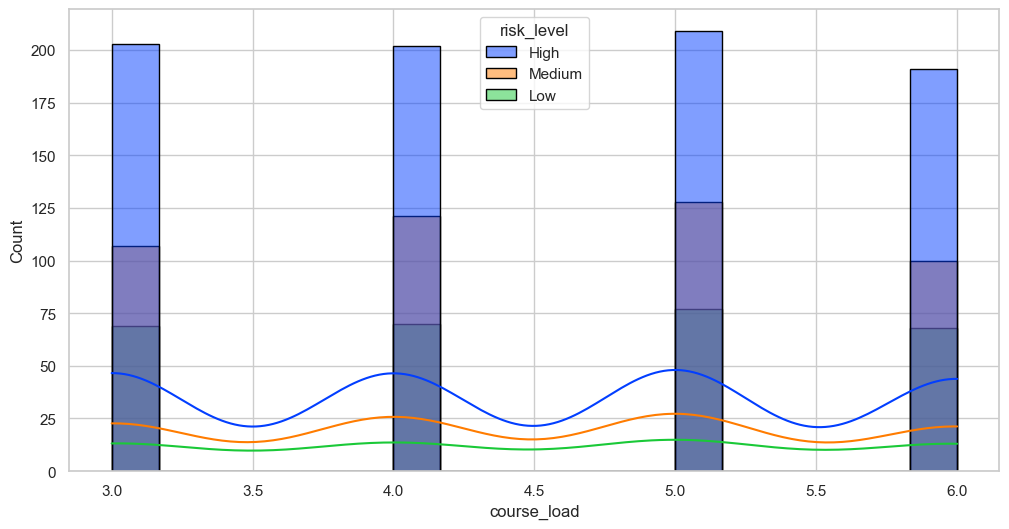

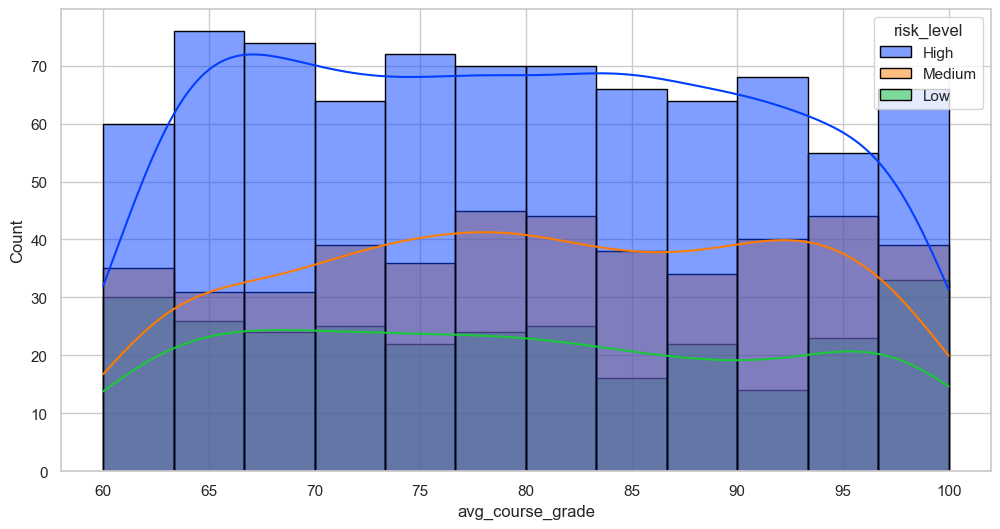

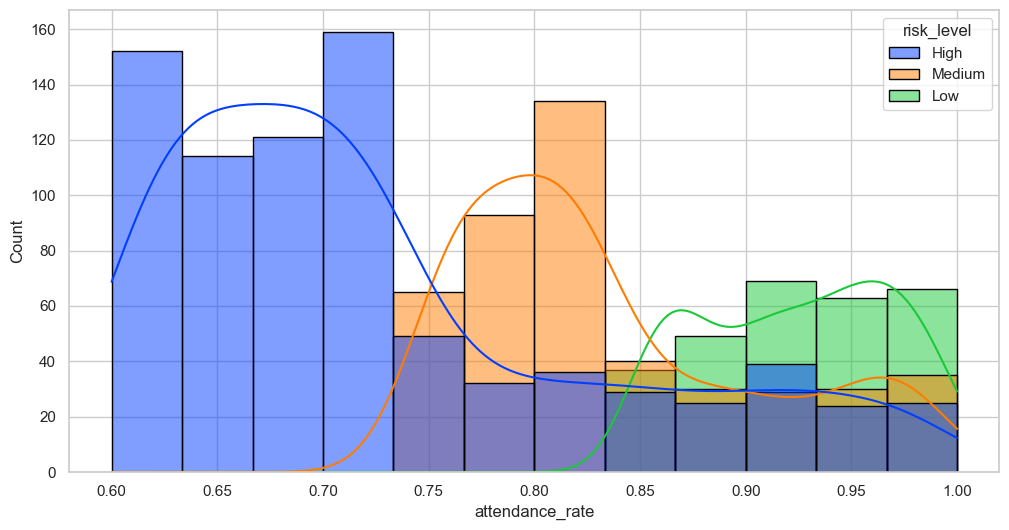

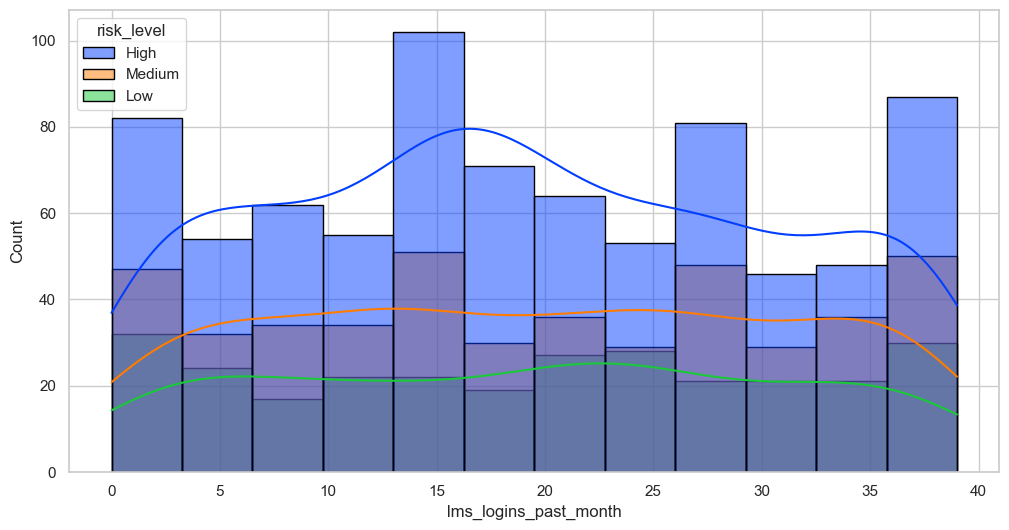

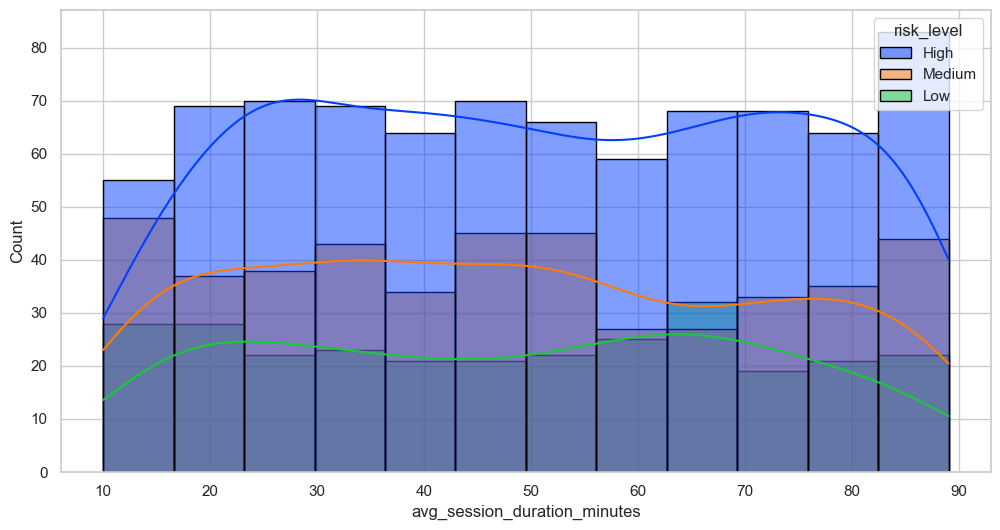

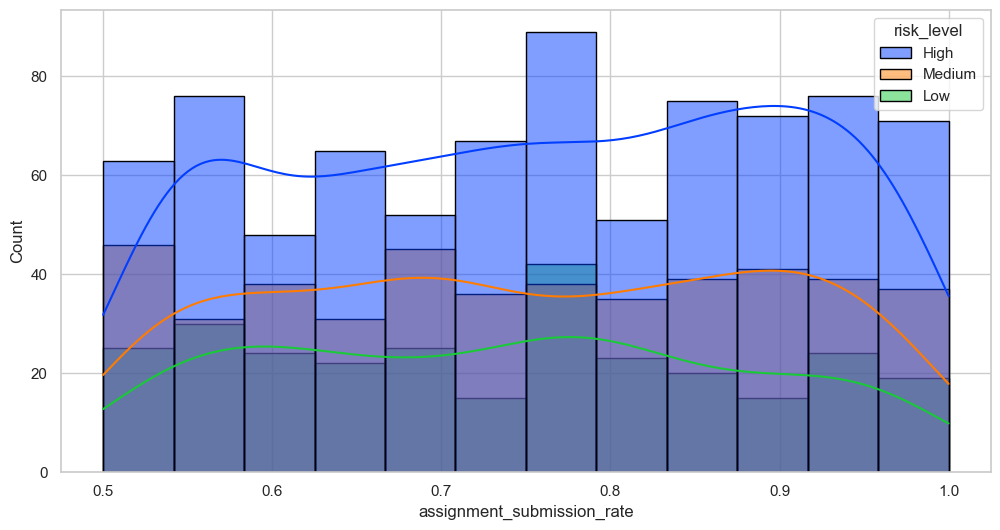

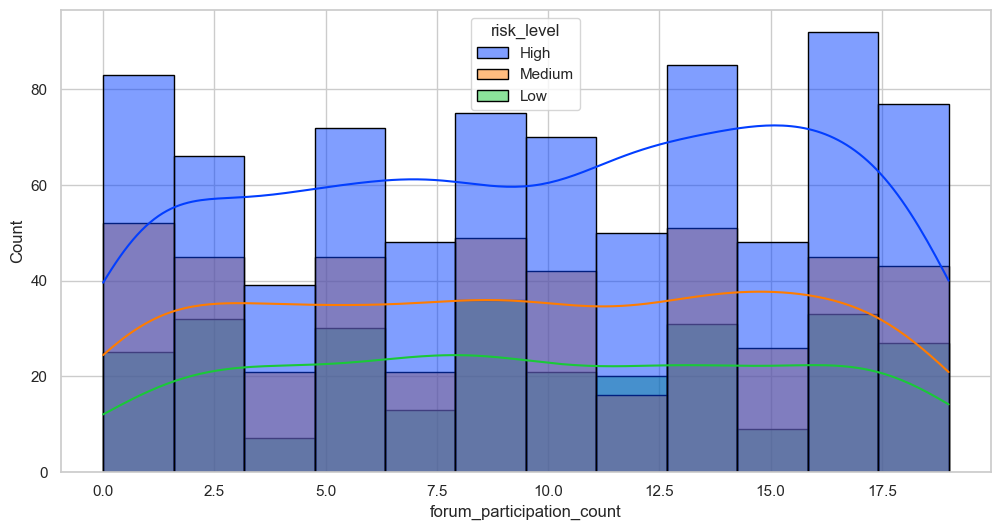

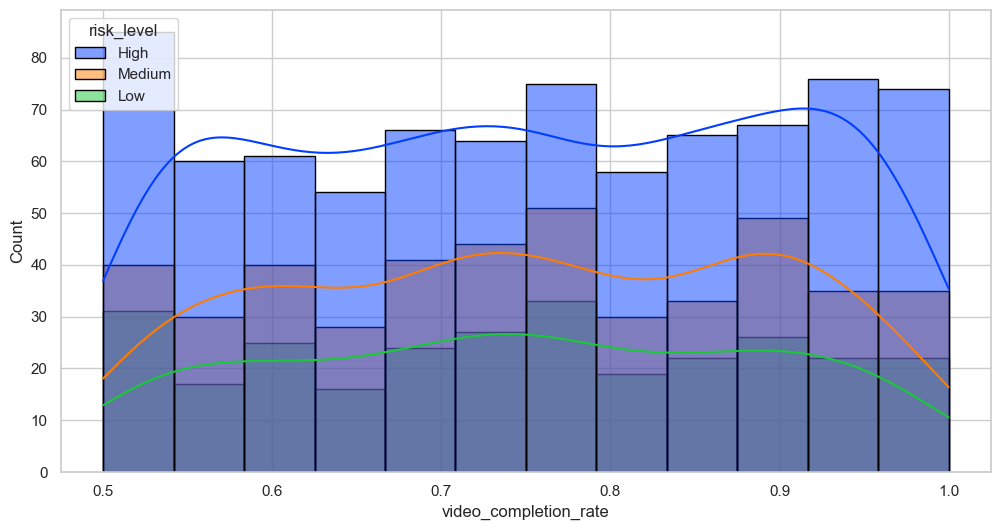

In [119]:
hist=df.select_dtypes(include="number")
for col in hist:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,hue="risk_level",edgecolor="black",palette="bright")
    plt.show()

## EDA Indeapth Analysis With Visualizations And Interactive Plotting 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1545 non-null   int64  
 1   gender                        1545 non-null   object 
 2   major                         1545 non-null   object 
 3   GPA                           1545 non-null   float64
 4   course_load                   1545 non-null   int64  
 5   avg_course_grade              1545 non-null   float64
 6   attendance_rate               1545 non-null   float64
 7   enrollment_status             1545 non-null   object 
 8   lms_logins_past_month         1545 non-null   int64  
 9   avg_session_duration_minutes  1545 non-null   int64  
 10  assignment_submission_rate    1545 non-null   float64
 11  forum_participation_count     1545 non-null   int64  
 12  video_completion_rate         1545 non-null   float64
 13  ris

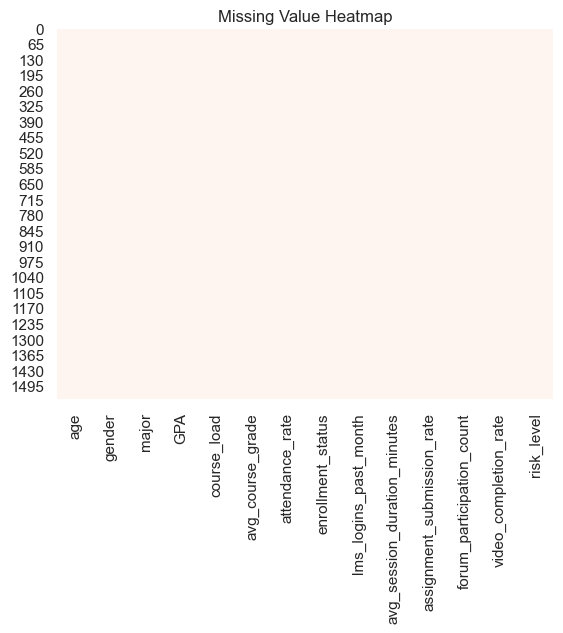

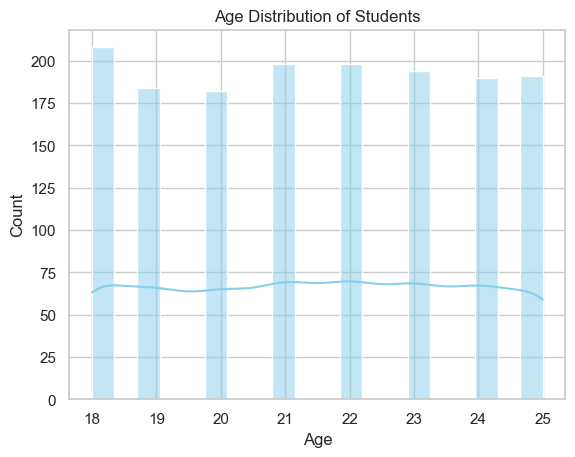

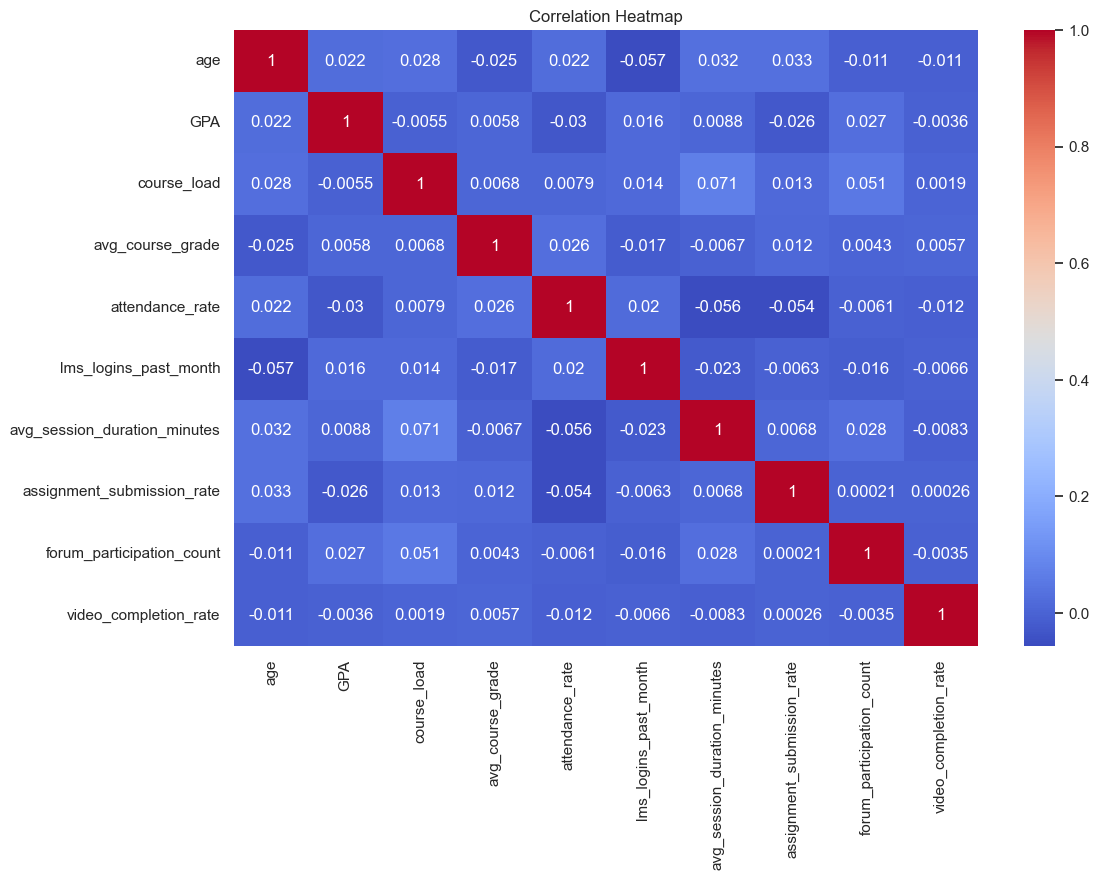

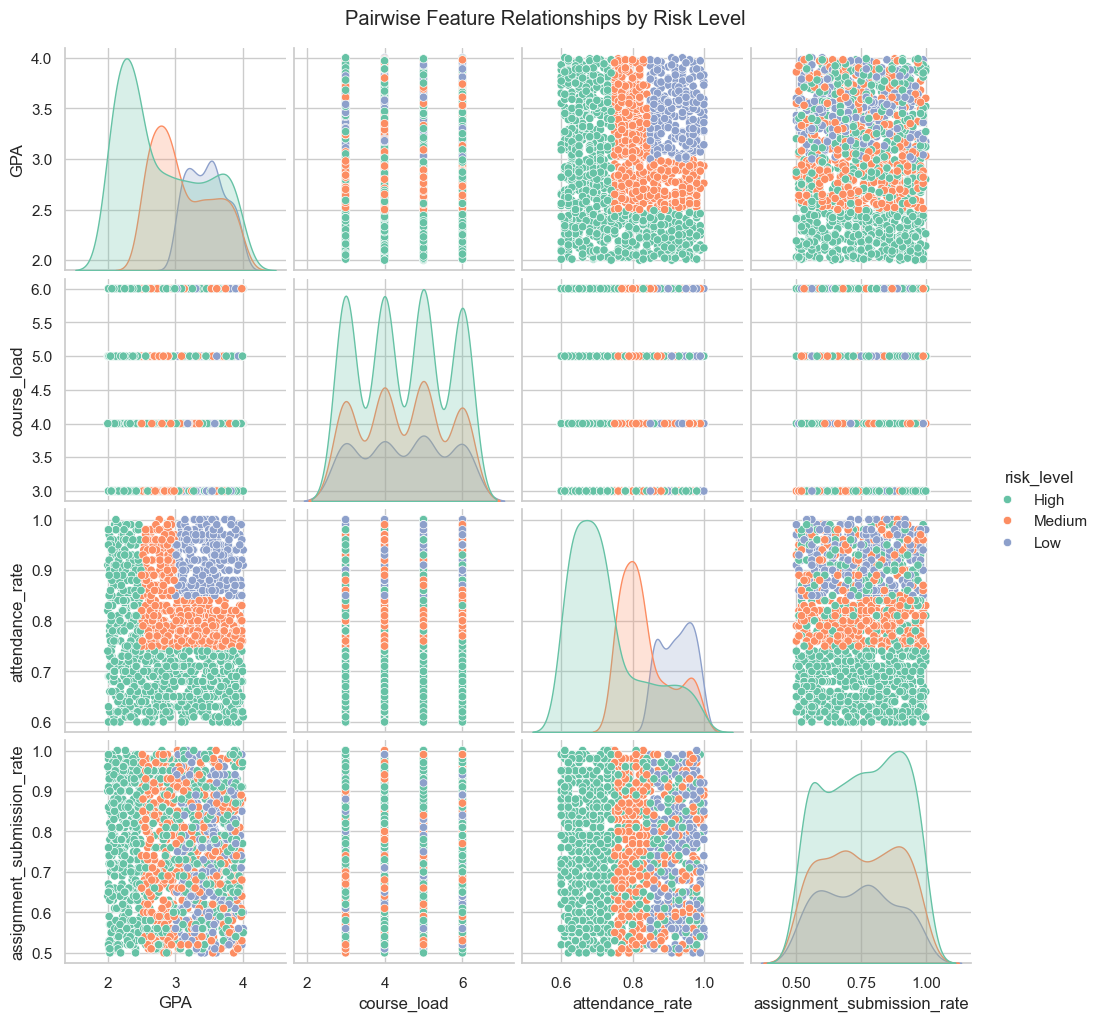

In [120]:
# 👁️ Quick overview
df.info()
df.describe(include='all')

# 🔍 Check for missing values
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Value Heatmap")
plt.show()

# 👨‍🎓 Gender Distribution
fig = px.pie(df, names='gender', title='Gender Distribution', hole=0.4)
fig.show()

# 📚 Major distribution
fig = px.histogram(df, x='major', title='Distribution of Majors', color='major')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# 🎯 Target Variable: Risk Level
fig = px.pie(df, names='risk_level', title='Student Risk Level Distribution', hole=0.4)
fig.show()

# 📊 Age distribution with KDE
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution of Students")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 🧮 GPA Distribution
fig = px.histogram(df, x='GPA', nbins=30, title='GPA Distribution', color='risk_level')
fig.update_traces(opacity=0.75)
fig.show()

# 🔗 GPA vs Risk Level
fig = px.box(df, x='risk_level', y='GPA', color='risk_level', title="GPA vs Risk Level")
fig.show()

# 📈 Attendance Rate Distribution
fig = px.histogram(df, x='attendance_rate', nbins=25, title="Attendance Rate Distribution", color='risk_level')
fig.show()

# 📊 Course Load vs GPA
fig = px.scatter(df, x='course_load', y='GPA', color='risk_level', size='avg_course_grade', 
                 hover_data=['major', 'gender'], title='Course Load vs GPA colored by Risk Level')
fig.show()

# 🎯 Assignment Submission Rate by Risk Level
fig = px.violin(df, y='assignment_submission_rate', x='risk_level', color='risk_level', box=True, points='all',
                title='Assignment Submission Rate by Risk Level')
fig.show()

# 🧠 LMS Logins vs Risk Level
fig = px.box(df, x='risk_level', y='lms_logins_past_month', color='risk_level',
             title='LMS Logins vs Risk Level')
fig.show()

# 🧮 Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 📊 Session Duration vs Risk Level
fig = px.box(df, x='risk_level', y='avg_session_duration_minutes', color='risk_level',
             title='Average Session Duration by Risk Level')
fig.show()

# 📈 Video Completion Rate
fig = px.histogram(df, x='video_completion_rate', nbins=20, color='risk_level',
                   title='Video Completion Rate Distribution')
fig.show()

# 📊 Forum Participation by Gender
fig = px.box(df, x='gender', y='forum_participation_count', color='gender',
             title='Forum Participation by Gender')
fig.show()

# 📉 Enrollment Status vs Risk
enrollment_risk = df.groupby(['enrollment_status', 'risk_level']).size().reset_index(name='count')
fig = px.bar(enrollment_risk, x='enrollment_status', y='count', color='risk_level',
             title='Enrollment Status vs Risk Level', barmode='group')
fig.show()

# 💡 Pairplot for top features
sns.pairplot(df[['GPA', 'course_load', 'attendance_rate', 'assignment_submission_rate', 'risk_level']], 
             hue='risk_level', palette='Set2')
plt.suptitle("Pairwise Feature Relationships by Risk Level", y=1.02)
plt.show()